In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [2]:
df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/bank.csv")


Questions:
I would like to find out the most frequent job, marital status, and education.
I would like to find out the distribution of the balance.
I would like to find out which account holder has the highest balance and its background (e.g. education, marital status).
I would like to find out how many days it takes in average after the client was last contacted from a previous campaign. I would like to find out whether there are extreme values.

**Quick Data Exploration**

In [3]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
len(df)


2000

2000

The dataset has 2000 data rows. It has both numerical and categorical attributes. The attributes age, balance, day, month, duration, pdays, and previous are numerical attributes.


The last attribute subscribed indicates whether the person is subscribed (yes) or not (no). This attribute would be a primary candidate for an attribute to learn to predict from the values of the other attributes
. 

In [6]:
df.dtypes


age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

age           float64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
subscribed     object
dtype: object

**Quick Examination of Numerical Attributes**

In [7]:
# Print statistical summary for all numerical attributes
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Age has (2000 - 1988) 12 missing values. No values are missing for the attributes balance, day, duration, campaign,
pdays, and previous.
Campaign and previous are rather a categorical attribute than a numerical attribute.
Since the mean (41.75) is greater than the median (38.00) for age, I assume that the frequency distribution is positively skewed.
Since the mean (1413.66) is greater than the median (551.00) for balance, I assume that the frequency distribution is positively skewed.
Since the mean (13.85) is greater than the median (12.00) for day, I assume that the frequency distribution is positively skewed.
Since the mean (292.02) is greater than the median (236.00) for duration, I assume that the frequency distribution is positively skewed.
Since the mean (1.91) is greater than the median (1.00) for campaign, I assume that the frequency distribution is positively skewed.
Since the mean (2.56) is greater than the median (2.00) for previous, I assume that the frequency distribution is positively skewed.
Since the mean (168) is less than the median (182) for pdays, I assume that the frequency distribution is negatively skewed.


**Descriptive Statistics for Categorical Attributes**


I will first look at the categorical attributes job, marital, education,housing, loan, default, contact, subscribed.

In [8]:
df['job'].describe()


count           1990
unique            11
top       management
freq             461
Name: job, dtype: object

count           1990
unique            11
top       management
freq             461
Name: job, dtype: object

There are 1990 observations for the attribute job. There are 11 unique elements for the attribute job. The mode/ most frequent value is management. The frequency of the mode is 461. 

In [9]:
df['job'].value_counts()


management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

Most of the account holders are working in a management position.

In [10]:
df['job'].count()


1990

1990

There are 10 missing values.

In [11]:
df['marital'].describe()


count        2000
unique          3
top       married
freq         1111
Name: marital, dtype: object

count        2000
unique          3
top       married
freq         1111
Name: marital, dtype: object

There are 2000 observations for the attribute marital. There are three unique elements for the attribute marital. 
The mode is married. The frequency of the mode is 1111. 

In [12]:
df['marital'].value_counts()


married     1111
single       674
divorced     215
Name: marital, dtype: int64

married     1111
single       674
divorced     215
Name: marital, dtype: int64

Most of the account holders are married followed by single and divorced.

In [13]:
df['marital'].count()


2000

2000

There are no missing values.

In [14]:
df['education'].describe()


count          1896
unique            3
top       secondary
freq            995
Name: education, dtype: object

count          1896
unique            3
top       secondary
freq            995
Name: education, dtype: object

There are 1896 observations for the attribute education. There are three unique elements for the attribute education. The mode is secondary. The frequency of the mode is 995. 

In [15]:
df['education'].value_counts()


secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

Most of the account holders have a secondary education followed by tertiary education and primary education.

In [16]:
df['education'].count()


1896

1896

There are 104 missing values for education.

In [17]:
df['housing'].describe()


count     2000
unique       2
top         no
freq      1037
Name: housing, dtype: object

count     2000
unique       2
top         no
freq      1037
Name: housing, dtype: object

There are 2000 observations for the attribute housing. There are two unique elements for the attribute housing. The mode is no. The frequency of the mode is 1037. 

In [18]:
df['loan'].describe()


count     2000
unique       2
top         no
freq      1750
Name: loan, dtype: object

count     2000
unique       2
top         no
freq      1750
Name: loan, dtype: object

There are 2000 observations for the attribute loan There are two unique elements for the attribute loan. The mode is no. The frequency of the mode is 1750. 

In [19]:
df['default'].describe()


count     2000
unique       2
top         no
freq      1985
Name: default, dtype: object

count     2000
unique       2
top         no
freq      1985
Name: default, dtype: object

There are 2000 observations for the attribute default. There are two unique elements for the attribute default. The mode is no. The frequency of the mode is 1985. 

In [20]:
df['contact'].describe()


count         1809
unique           2
top       cellular
freq          1663
Name: contact, dtype: object

count         1809
unique           2
top       cellular
freq          1663
Name: contact, dtype: object

There are 1809 observations for the attribute contact. There are two unique elements for the attribute contact. The mode is cellular. The frequency of the mode is 1663. 

In [21]:
df['subscribed'].describe()


count     2000
unique       2
top         no
freq      1000
Name: subscribed, dtype: object

count     2000
unique       2
top         no
freq      1000
Name: subscribed, dtype: object

There are 2000 observations for the attribute subscribed. There are two unique elements for the attribute contact. The mode is no. The frequency of the mode is 1000. 

**Descriptive Statistics for Numerical Attributes**


In [22]:
df.mean()


age           41.753018
balance     1413.663500
day           13.851500
duration     292.020500
campaign       1.909500
pdays        167.896000
previous       2.561500
dtype: float64

age           41.753018
balance     1413.663500
day           13.851500
duration     292.020500
campaign       1.909500
pdays        167.896000
previous       2.561500
dtype: float64

The average age is 41.75. The average balance is 1413.66. The average number of days is 13.85. The average last contact duration in seconds is 292. The average for  the number of contacts performed during this campaign and for this client is 1.9. The average for the number of days that passed by after the client was last contacted from a previous campaign is 167.9. 


In [23]:
df.median()


age          38.0
balance     551.0
day          12.0
duration    236.0
campaign      1.0
pdays       182.0
previous      2.0
dtype: float64

age          38.0
balance     551.0
day          12.0
duration    236.0
campaign      1.0
pdays       182.0
previous      2.0
dtype: float64

The median for age is 38. The median for balance is 551.00. The median for day is 12. The median for last contact duration is 236. the median for the number of contacts performed during this campaign and for this client is 1.0. The median for the number of days that passed by after the client was last contacted from a previous campaign is 182.


In [24]:
df.std()


age           12.724358
balance     3131.224213
day            9.712189
duration     221.557295
campaign       1.378862
pdays        131.754126
previous       3.400735
dtype: float64

age           12.724358
balance     3131.224213
day            9.712189
duration     221.557295
campaign       1.378862
pdays        131.754126
previous       3.400735
dtype: float64

Balance has a high standard variation. Therefore, the balance values are spread out over a wide range. Last contact duration and the number of days that passed by after the client was last contacted from a previous campaign also have a high standard variation.


I will check at the distribution of the numerical attribute balance.


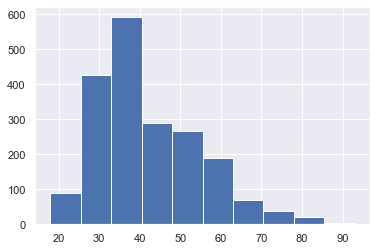

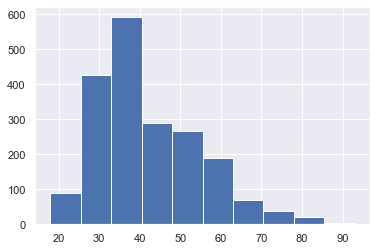

In [25]:
df.age.hist()


Distribution of age -> Half of the account holders are between 30 and 40.


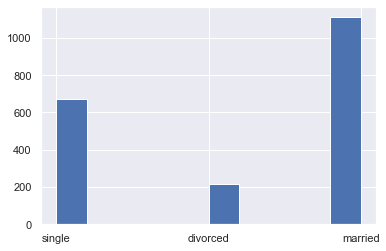

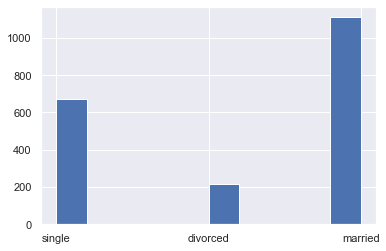

In [26]:
df.marital.hist()


Distribution of the marital status -> More than half of the account holders are married.


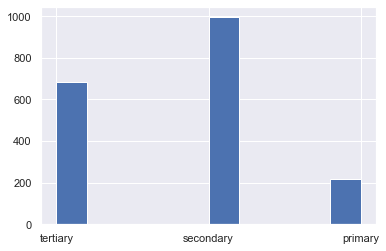

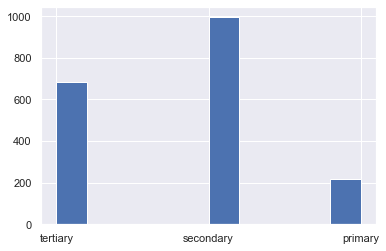

In [27]:
df.education.hist()


Distribution of education -> Half of all account holders (1000 persons) have a secondary education.


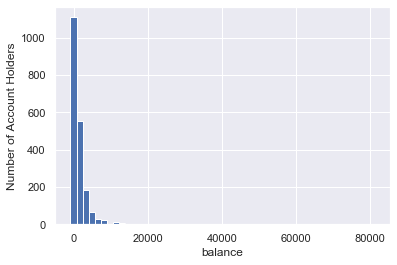

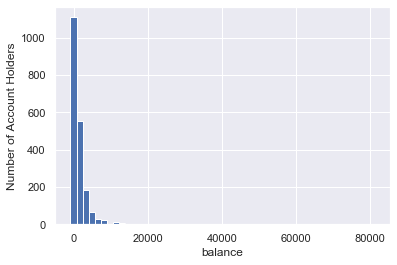

In [28]:
df['balance'].hist(bins=50)
plt.xlabel('balance')
plt.ylabel('Number of Account Holders')
plt.show()


There are some extreme values for balance. I will look at the box plot.


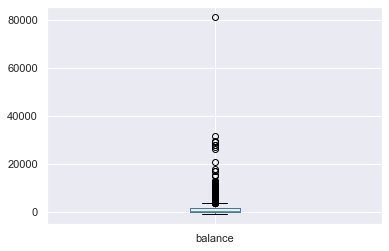

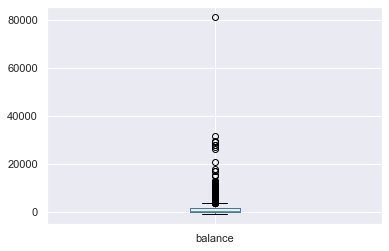

In [29]:
df.boxplot(column='balance')
plt.show()


There are also outliers/extreme values. The most exteme value is a balance of 80000. I will group it by the categorical attribute education.


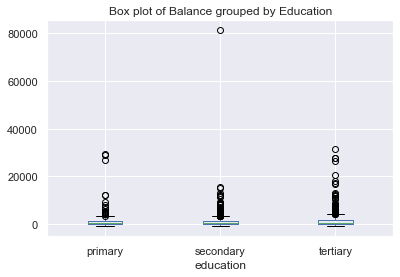

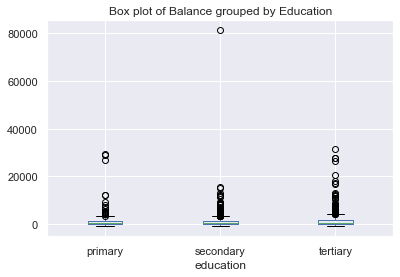

In [30]:
# Box plots of balance, grouped by the categorical attribute education
df.boxplot(column='balance', by='education')
plt.title('Box plot of Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()


There is no difference between the mean balance of primary, secondary, and tertiary education. But there are extreme values. There are account holders with higher balances. The most extreme balance belongs to an account holder with secondary education.


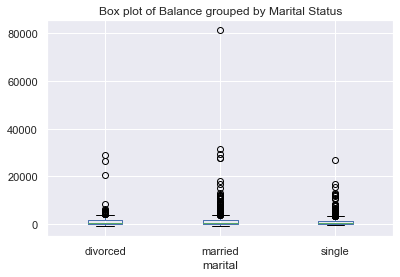

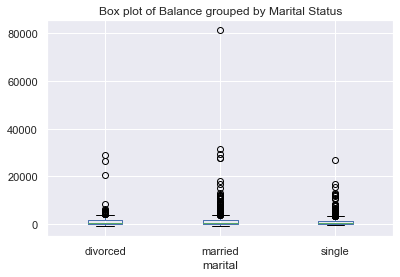

In [31]:
# Box plots of balance, grouped by the categorical attribute marital status
df.boxplot(column='balance', by='marital')
plt.title('Box plot of Balance grouped by Marital Status')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()


There is no difference between the mean balance of primary, secondary, and tertiary education. But there are extreme values. There are account holders with higher balances.The most extreme balance belongs to an account holder who is married.


I will examine the numerical attribute campaign.

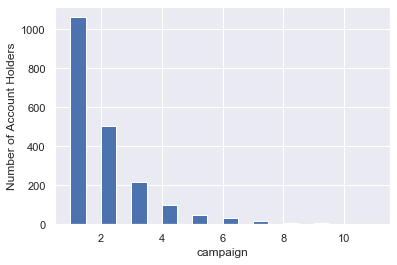

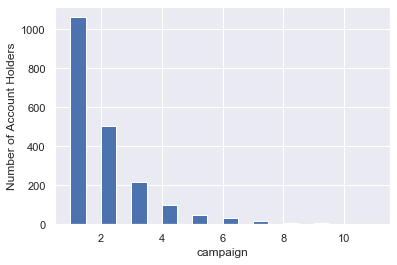

In [32]:
df['campaign'].hist(bins=20)
plt.xlabel("campaign")
plt.ylabel('Number of Account Holders')
plt.show()


Most of the account holders have been contacted once during the campaign. There are few outliers. I will look at the box plot.


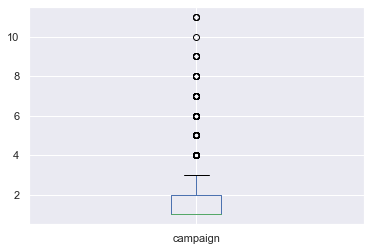

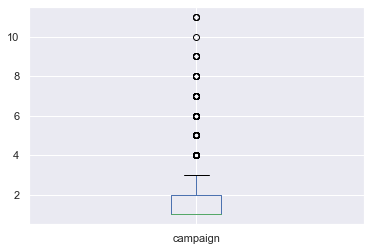

In [33]:
df.boxplot(column='campaign')
plt.show()


There are also some extreme values.


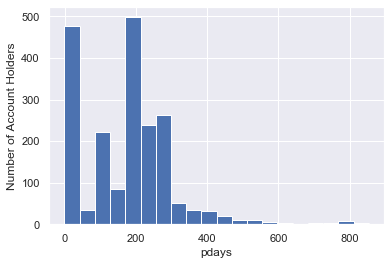

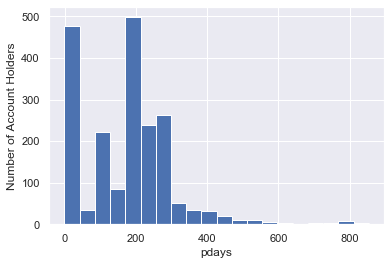

In [34]:
df['pdays'].hist(bins=20)
plt.xlabel("pdays")
plt.ylabel('Number of Account Holders')
plt.show()


There are few outliers/ extreme values. The most extreme value for number of days that passed by after the client was last contacted from a previous campaign is 800 days. I will look at the box plot.


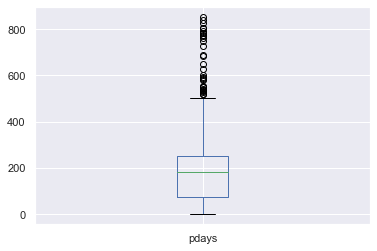

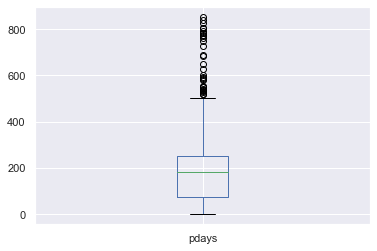

In [35]:
df.boxplot(column='pdays')
plt.show()


It also shows extreme values.

I will group balance by education as violin plots.


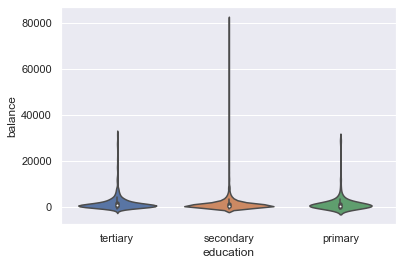

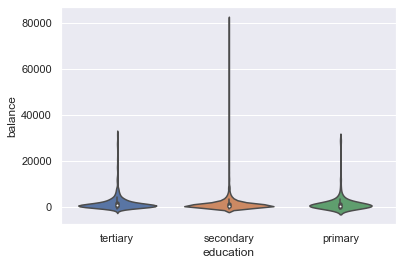

In [36]:
sns.violinplot(data=df, x='education', y='balance')
plt.show()


There is no difference between the mean balance of primary, secondary, and tertiary education. But there are extreme values. I will split each violin plot by the binary attribute housing.


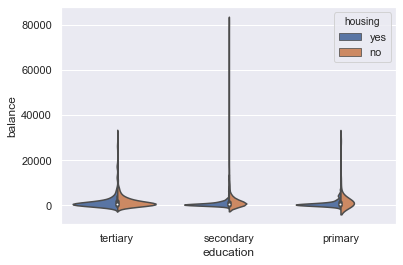

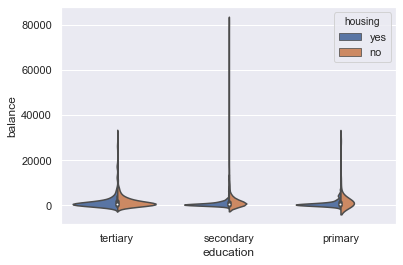

In [37]:
sns.violinplot(data=df, x='education', y='balance', hue='housing', split=True)
plt.show()


The plot suggests that account holders with secondary education that have a housing loan have more even distribution of the balances than account holders with tertiary and primary education that have a housing loan.

I will split each violin plot by the binary attribute loan.

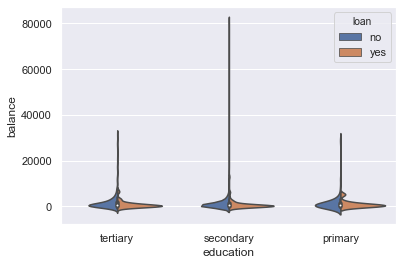

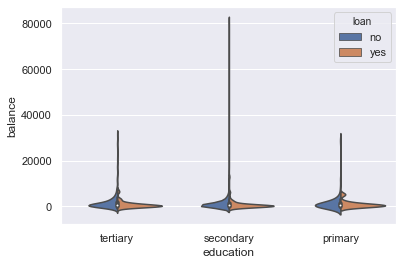

In [38]:
sns.violinplot(data=df, x='education', y='balance', hue='loan', split=True)
plt.show()


The plot suggests that account holders with secondary education that doesn't have a personal loan have more even distribution of the balances than account holders with tertiary and primary education.

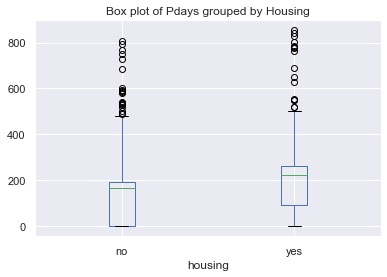

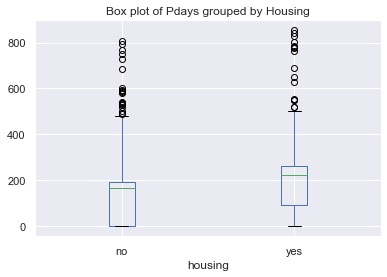

In [39]:
# Box plots of pdays, grouped by the categorical attribute housing
df.boxplot(column='pdays', by='housing')
plt.title('Box plot of Pdays grouped by Housing')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

The mean for the number of days that passed by after the client was last contacted from a previous campaign is slightly different for the account holders who have a housing loan. It is slightly more days passed for account holders with housing loan. I will do a box plot for pdays grouped by loan to compare it to pdays with housing loan.

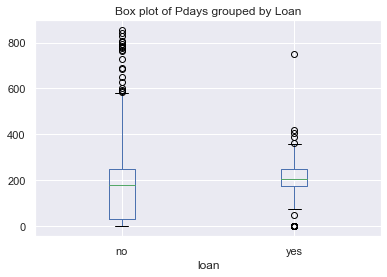

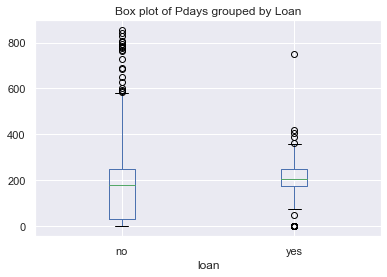

In [40]:
# Box plots of pdays, grouped by the categorical attribute loan
df.boxplot(column='pdays', by='loan')
plt.title('Box plot of Pdays grouped by Loan')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

The mean for the number of days that passed by after the client was last contacted from a previous campaign is also different for the account holders who have a personal loan. It is also more days passed for account holders with housing loan. 